This functions retrieves the fitted MOFA models, plots Figure 2B and returns MOFA Factors and factor weights

In [1]:
library(reticulate)
use_condaenv("scvelo2", required = TRUE)
library(ggplot2)
library(MOFA2)


Attaching package: ‘MOFA2’


The following object is masked from ‘package:stats’:

    predict




In [2]:
# Prepare object

In [3]:
model <- load_model("./mofa_out_cos_all.hdf5")

In [4]:
meta_data = read.table("./meta.tab", header = TRUE, sep = "\t", stringsAsFactors = FALSE, comment.char = "$")
list_cells = read.csv('./list_cells.csv',header = FALSE)

In [5]:
rownames(meta_data) = meta_data$cell
meta_data = meta_data[list_cells$V1,]

In [6]:
sample_metadata <- model@samples_metadata
row.names(sample_metadata) = sample_metadata$sample
sample_metadata$type <- meta_data$celltype
sample_metadata$stage <- meta_data$stage
sample_metadata$batch <- meta_data$sample
samples_metadata(model) <- sample_metadata

In [8]:
calculate_variance_explained(model)

,spliced,unspliced
Factor1,3.0828646,0.6661887
Factor2,2.0991246,0.0000000
Factor3,1.6103122,0.0000000
Factor4,1.1600209,0.3153877
Factor5,1.2850231,0.0000000
Factor6,0.8052496,0.2669029
Factor7,0.8497732,0.2084671
Factor8,0.6597459,0.2201942


In [9]:
# Plot

In [10]:
p <- plot_variance_explained(model, x="group", y="factor", plot_total = T);

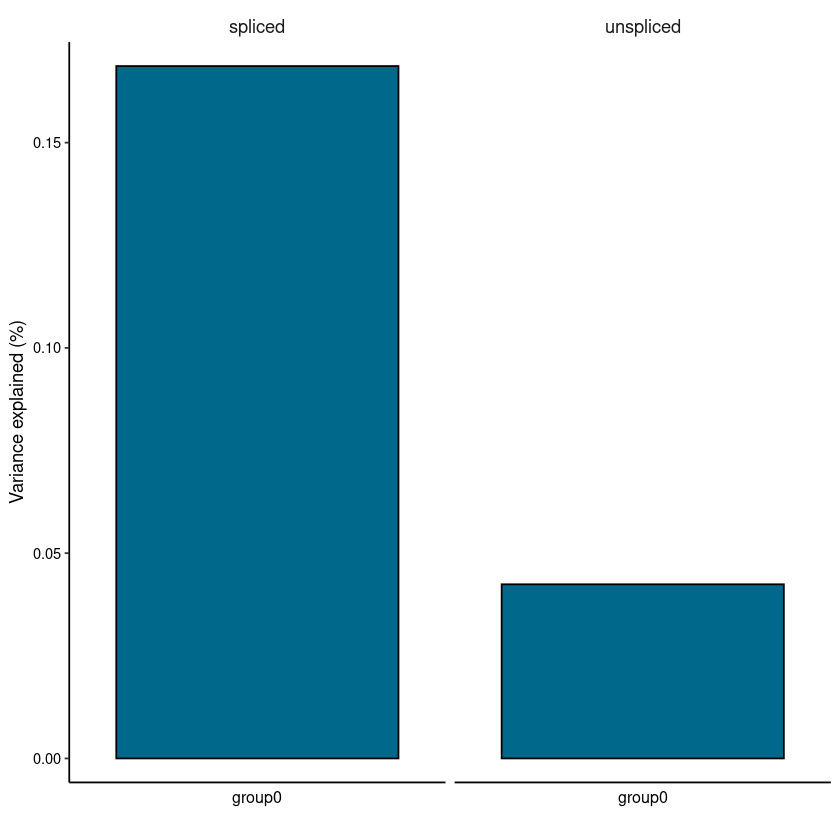

In [11]:
p[[2]]

In [12]:
# Save tables

In [13]:
factors <- get_factors(model, as.data.frame = T)
weights <- get_weights(model, as.data.frame = T)

In [ ]:
write.csv(factors, './factors_mofa_all.csv')
write.csv(weights, './weights_mofa_all.csv')